# Artificial Neural Networks

## xor 형태의 데이터 생성

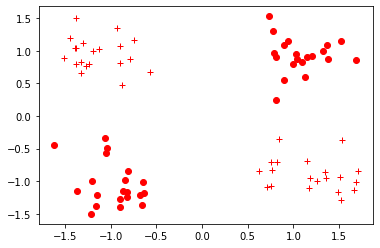

In [73]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_dim=2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                    centers=[[1,1], [-1,-1], [1,-1], [-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=80, n_features=n_dim,
                    centers=[[1,1], [-1,-1], [1,-1], [-1,1]], shuffle=True, cluster_std=0.3)
y_train = y_train // 2
y_test = y_test // 2

plt.plot(x_train[y_train == 0].T[0], x_train[y_train == 0].T[1], 'ro')
plt.plot(x_train[y_train == 1].T[0], x_train[y_train == 1].T[1], 'r+')
plt.show()

## numpy array를 pytorch tensor 데이터로 변환

In [0]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

## 기존의 logistic regression 구현 및 테스트

In [115]:
model = nn.Linear(2,1)
sigmoid = nn.Sigmoid()
bceloss = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(5001):
    hypothesis = sigmoid(model(x_train))
    cost = bceloss(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        test_hypo = sigmoid(model(x_test))
        test_cost = bceloss(test_hypo, y_test)

    if epoch % 1000==0: print(cost.item(), test_cost.item())

0.7285122871398926 0.7244953513145447
0.6921212077140808 0.6924043893814087
0.6921212077140808 0.6924043893814087
0.6921212077140808 0.6924043893814087
0.6921212077140808 0.6924043893814087
0.692121148109436 0.6924042701721191


## 1개의 층이 추가된 artificial neural network 구현 및 테스트

In [119]:
linear1 = nn.Linear(2,2)
linear2 = nn.Linear(2,1)
sigmoid = nn.Sigmoid()

optimizer = torch.optim.Adam(list(linear1.parameters()) + list(linear2.parameters()))

for epoch in range(5001):
    hypothesis = sigmoid(linear2(sigmoid(linear1(x_train))))
    cost = bceloss(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        test_hypo = sigmoid(linear2(sigmoid(linear1(x_test))))
        test_cost = bceloss(test_hypo, y_test)

    if epoch % 1000==0: print(cost.item(), test_cost.item())

0.6909931898117065 0.6914865374565125
0.5495632886886597 0.5641810894012451
0.4465261995792389 0.46401795744895935
0.4027028977870941 0.4182608723640442
0.38097506761550903 0.3940587341785431
0.36888113617897034 0.37965449690818787


# MNIST with ANN

## MNIST 데이터 불러오기



In [120]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


## softmax regression 구현 및 테스트

In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = mnist_train.data.view(-1,28*28).float()
y_train = mnist_train.targets
x_test = mnist_test.data.view(-1, 28*28).float()
y_test = mnist_test.targets

model = nn.Linear(28*28, 10)

optimizer = torch.optim.Adam(model.parameters())

for epoch in range(201):
    z = model(x_train)
    cost = F.cross_entropy(z, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  
    with torch.no_grad():
        test_z = model(x_test)
        test_cost = F.cross_entropy(test_z, y_test)

    if epoch % 10 == 0:
        print("epoch: {}, cost: {:.6f}, test: {:.6f}".format(epoch, cost.item(), test_cost.item()))

epoch: 0, cost: 61.526722, test: 43.761410
epoch: 10, cost: 10.671265, test: 9.171288
epoch: 20, cost: 6.185443, test: 5.867116
epoch: 30, cost: 4.627743, test: 4.522978
epoch: 40, cost: 3.807749, test: 3.794882
epoch: 50, cost: 3.293774, test: 3.342130
epoch: 60, cost: 2.912874, test: 3.010324
epoch: 70, cost: 2.613459, test: 2.761385
epoch: 80, cost: 2.373822, test: 2.569729
epoch: 90, cost: 2.178716, test: 2.413794
epoch: 100, cost: 2.017331, test: 2.286477
epoch: 110, cost: 1.880082, test: 2.179530
epoch: 120, cost: 1.759764, test: 2.081423
epoch: 130, cost: 1.652785, test: 1.995425
epoch: 140, cost: 1.557287, test: 1.916953
epoch: 150, cost: 1.471090, test: 1.843421
epoch: 160, cost: 1.393154, test: 1.778612
epoch: 170, cost: 1.322171, test: 1.718739
epoch: 180, cost: 1.257088, test: 1.662655
epoch: 190, cost: 1.196991, test: 1.610499
epoch: 200, cost: 1.141395, test: 1.561036


## softmax regression 정확도 측정

In [129]:
with torch.no_grad():
    z = model(x_test).argmax(1)
    accuracy = (y_test==z).sum().item()/len(z)
    print("accuracy: ", accuracy)

accuracy:  0.8901


## 1개의 레이어를 추가한 ANN 구현 및 테스트

In [134]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = mnist_train.data.view(-1,28*28).float()
y_train = mnist_train.targets
x_test = mnist_test.data.view(-1, 28*28).float()
y_test = mnist_test.targets

linear1 = nn.Linear(28*28, 100)
linear2 = nn.Linear(100, 10)
relu = nn.ReLU()

optimizer = torch.optim.Adam(list(linear1.parameters())+list(linear2.parameters()))

for epoch in range(201):
    z = linear2(relu(linear1(x_train)))
    cost = F.cross_entropy(z, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        z_test = linear2(relu(linear1(x_test)))
        cost_test = F.cross_entropy(z_test, y_test)
        

    if epoch % 10 == 0:
        print("epoch: {}, cost: {:.6f}, test: {:.6f}".format(epoch, cost.item(), cost_test.item()))

epoch: 0, cost: 31.851297, test: 21.166388
epoch: 10, cost: 2.642879, test: 2.455970
epoch: 20, cost: 1.330415, test: 1.248854
epoch: 30, cost: 0.851273, test: 0.864670
epoch: 40, cost: 0.638921, test: 0.657743
epoch: 50, cost: 0.524766, test: 0.558701
epoch: 60, cost: 0.455071, test: 0.499241
epoch: 70, cost: 0.405366, test: 0.456914
epoch: 80, cost: 0.366741, test: 0.425122
epoch: 90, cost: 0.336258, test: 0.399736
epoch: 100, cost: 0.310854, test: 0.379031
epoch: 110, cost: 0.289047, test: 0.362093
epoch: 120, cost: 0.269890, test: 0.347361
epoch: 130, cost: 0.253115, test: 0.334351
epoch: 140, cost: 0.238340, test: 0.322309
epoch: 150, cost: 0.225361, test: 0.311876
epoch: 160, cost: 0.213803, test: 0.302672
epoch: 170, cost: 0.203310, test: 0.294611
epoch: 180, cost: 0.193722, test: 0.287159
epoch: 190, cost: 0.184951, test: 0.280416
epoch: 200, cost: 0.176825, test: 0.274429


## ANN의 정확도 측정

In [136]:
with torch.no_grad():
    z = linear2(relu(linear1(x_test))).argmax(1)
    accuracy = (y_test==z).sum().item()/len(z)
    print("accuracy: ", accuracy)

accuracy:  0.9309


## 이미지와 함께 확인

True: 9, Pred: 9


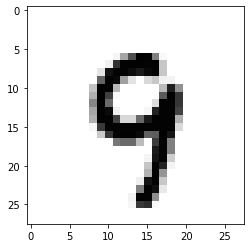

In [160]:
import matplotlib.pyplot as plt
import random

with torch.no_grad():
  r = random.randint(0, len(x_test)-1) # r = 0~ 9999
  x_single_test = x_test[r].unsqueeze(0)
  y_single_test = y_test[r].unsqueeze(0)
  
  single_prediction = model(x_single_test).argmax(1)
  print('True: {}, Pred: {}'.format(y_single_test.item(), single_prediction.item()))

  plt.imshow(x_single_test.view(28, 28), cmap='Greys')
  plt.show()